Імпортую модулі та завантажую дані

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

# 1) Виведення перших 24 і 36 цифр з набору

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_first_n_elements(data, targets, n):
    nrows = (n + 5) // 6
    ncols = min(6, n)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4, 6)) 

    for ax, image, target in zip(axes.ravel(), data[:n], targets[:n]):
        ax.imshow(image, cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(target)

    plt.tight_layout()
    plt.show()


Виведення перших 24 елементів

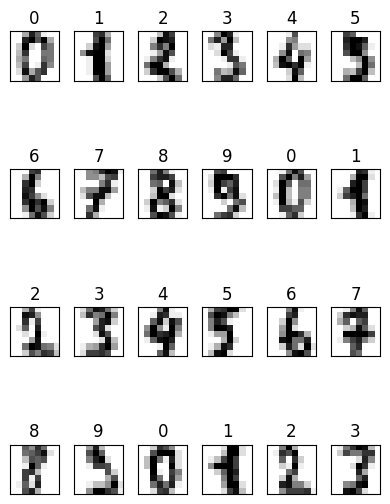

In [8]:
plot_first_n_elements(digits.images, digits.target, 24)

Виведення перших 36 елементів

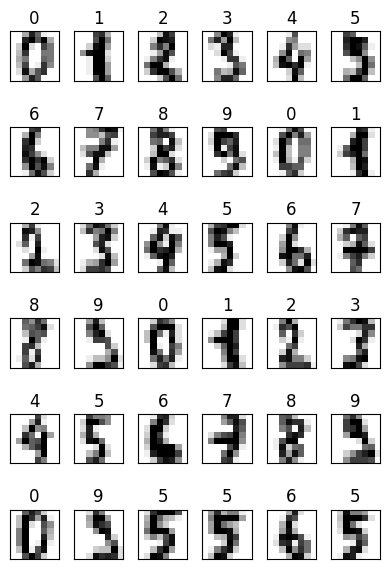

In [9]:
plot_first_n_elements(digits.images, digits.target, 36)

# 2) Розбиття даних на навчальні та тестові

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 1)

In [12]:
X_train.shape

(1437, 64)

In [13]:
X_test.shape

(360, 64)

# 3) Створення та навчання моделі

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

Навчаємо модель

In [16]:
knn.fit(X = X_train, y = y_train)

KNeighborsClassifier()

# 4) Виконаємо прогнозування класів

In [17]:
predicted = knn.predict(X = X_test)
expected = y_test

# 5) Порівняємо прогнозовані цифри з очікуваними для перших 20, 24, 36 тестових зразків

In [18]:
predicted[:20]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4])

In [19]:
expected[:20]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4])

Модель правильно класифікувала всі числа

In [20]:
predicted[:24]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6])

In [21]:
expected[:24]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6])

Модель правильно класифікувала всі числа

In [22]:
predicted[:36]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8])

In [23]:
expected[:36]

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8])

Модель правильно класифікувала всі числа

Виконавши порівняння на перших 36 зразках, бачимо доволі високу точність прогнозування, адже з 36 прогнозів всі збіглись з очікуваними результатами

# 6) Застосування метрик для оцінки точності моделей та пояснення результатів

# 6.1 Метод score оцінювача

In [24]:
print(f'{knn.score(X_test,y_test):.2%}')

99.44%


Отримано так званий коефіцієнт детермінації R^2. Можна сказати, що 99.44% варіації вихідних даних пояснюється цією моделлю.

# 6.2 Матриця невідповідностей

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
confusion

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Головна діагональ матриці (з лівого верхнього кута до правого нижнього кута) відображає кількість правильно класифікованих зразків для кожного класу, а не головна діагональ - неправильно класифіковані зразки.


<p>Зробимо висновки:
<ul>
    <li>Модель жодного разу не припустилась помилки для 7 з 9 класів</li>
    <li>Модель допустила 1 помилку при ідентифікації для 2 з 9 класів</li>
</ul>

# 7) Звіт класифікації

In [27]:
from sklearn.metrics import classification_report

In [28]:
names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names = names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      1.00      1.00        29
           9       0.97      1.00      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Як бачимо зі звіту, модель показує досить хорошу загальну точність прогнозування - 99%. Найбільше проблем у моделі виникає з класифікацією числа 7 та 9.

# 8) Використання та порівняння класифікаторів KNeighborsClassifier, SVC та GaussianNB

In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

* Звіт для <b>KNeighborsClassifier</b> був отриманий у попередньому завданні

Створення SVC класифікатора

In [30]:
svc = SVC()
svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)

In [31]:
print(classification_report(y_test, predicted_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Створення GaussianNB класифікатора

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted_gnb = gnb.predict(X_test)

In [33]:
print(classification_report(y_test, predicted_gnb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.83      0.83      0.83        35
           2       0.96      0.64      0.77        36
           3       0.91      0.78      0.84        41
           4       0.92      0.92      0.92        38
           5       0.89      0.83      0.86        30
           6       0.97      1.00      0.99        37
           7       0.79      1.00      0.88        37
           8       0.53      0.97      0.68        29
           9       1.00      0.59      0.74        34

    accuracy                           0.85       360
   macro avg       0.88      0.85      0.85       360
weighted avg       0.89      0.85      0.85       360



Порівнюючи звіти класифікацій різних моделей, робимо висновок, шо модель GaussianNB найгірше серед досліджуваних справляється з поставленою задачею, у той час як KNeighborsClassifier та SVC показують дуже схожий результат і є однаково ефективними

# 9) Налаштування гіперпараметру K в KNeighborsClassifier

Для оцінки точності класифікатора використовуватимемо метрику:

In [34]:
from sklearn.metrics import accuracy_score

Створимо масив можливих значень K

In [35]:
k_values = range(1, 26)

Створимо масив пустих списків для зберігання точності

In [36]:
test_accuracy = []

Зробимо перебір по різним значенням k

In [37]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    test_pred = knn.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, test_pred))

for k,  test_acc in zip(k_values,  test_accuracy):
    print("k =", k, "- Точність на тестових даних:", test_acc)

k = 1 - Точність на тестових даних: 0.9916666666666667
k = 2 - Точність на тестових даних: 0.9916666666666667
k = 3 - Точність на тестових даних: 0.9944444444444445
k = 4 - Точність на тестових даних: 0.9944444444444445
k = 5 - Точність на тестових даних: 0.9944444444444445
k = 6 - Точність на тестових даних: 0.9944444444444445
k = 7 - Точність на тестових даних: 0.9972222222222222
k = 8 - Точність на тестових даних: 0.9972222222222222
k = 9 - Точність на тестових даних: 0.9972222222222222
k = 10 - Точність на тестових даних: 0.9944444444444445
k = 11 - Точність на тестових даних: 0.9916666666666667
k = 12 - Точність на тестових даних: 0.9944444444444445
k = 13 - Точність на тестових даних: 0.9916666666666667
k = 14 - Точність на тестових даних: 0.9916666666666667
k = 15 - Точність на тестових даних: 0.9861111111111112
k = 16 - Точність на тестових даних: 0.9861111111111112
k = 17 - Точність на тестових даних: 0.9861111111111112
k = 18 - Точність на тестових даних: 0.9861111111111112
k

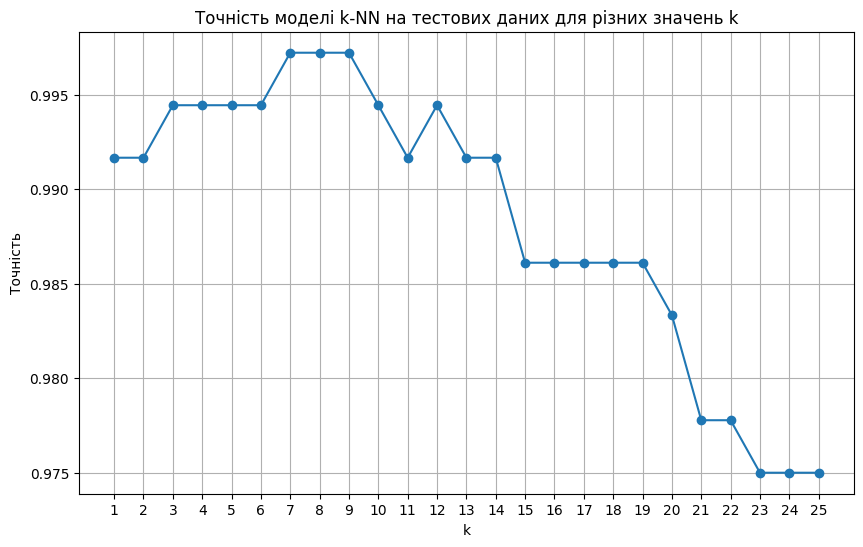

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracy, marker='o')
plt.title('Точність моделі k-NN на тестових даних для різних значень k')
plt.xlabel('k')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.grid(True)
plt.show()

З графіку видно, що максимальна точність для даного набору даних за використанням методу K-найближчих сусідів спостерігається при K = 7,8,9. 